<a href="https://colab.research.google.com/github/armanut86/arman/blob/master/descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Q8.

In [1]:
#import block
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from matplotlib.patches import Polygon
from matplotlib.lines import Line2D   
from numpy import linalg as LNG 
from scipy.optimize import minimize_scalar
from scipy.optimize import minimize
from scipy import optimize
import csv


In [ ]:
def f(x):
  out=x[0]**2+x[0]*x[1]+10*(x[1]**2)-22*x[1]-5*x[0]
  return out;
def gradf(x):
  y=np.zeros(2)
  y[0]=2*x[0]+x[1]-5
  y[1]=x[0]+20*x[1]-22
  return y;
def contplot(f):
  delta = 0.01
  x = np.arange(-20,20, delta)
  y = np.arange(-20,20, delta)
  X, Y = np.meshgrid(x, y)
  Z=f([X,Y])
  fig, ax = plt.subplots(figsize=(10, 8))
  CS = ax.contour(X, Y, Z)
  ax.set_title('Plot')
  return;

In [ ]:
#initialization
gamma=.08
x=np.array([1,10])
flag=0
i=0


number of iterations: 61


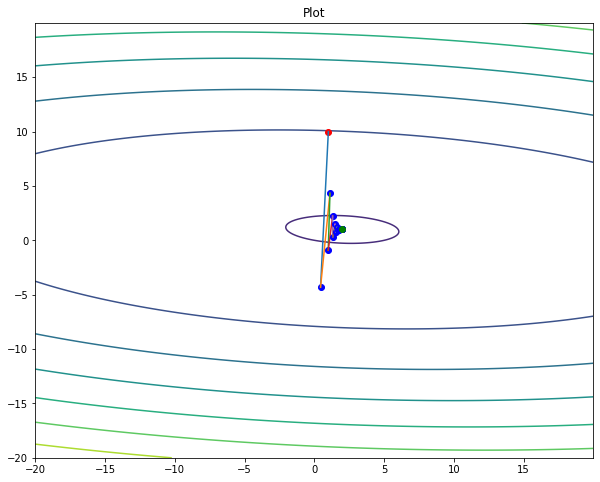

In [ ]:
#steepest descent
contplot(f)
plt.plot(x[0],x[1],'ro') 
with open('q8_file.csv', mode='w') as q8f:
    q8 = csv.writer(q8f, delimiter=',', quotechar='"', quoting=csv.QUOTE_ALL)
    while(flag<1 and i<1000):
      i=i+1
      xb=2-2+x
      #updating x
      x=x-gamma*gradf(x)
      q8.writerow([x[0], x[1], f(x)])

      if (np.sqrt((np.abs(x[0]-xb[0]))**2+(np.abs(x[1]-xb[1]))**2))<.00001:
        plt.plot(x[0],x[1],'go') 
        print('number of iterations:',i)
        flag=1
      else:
        plt.plot(x[0],x[1],'bo') 
        plt.plot([xb[0],x[0]],[xb[1],x[1]])

In [ ]:
df = pd.read_csv('q8_file.csv')
df.to_csv('q8.csv') 

NameError: ignored

#Q9

In [117]:
def f(x): #function f definition
  m=x.size-1
  out=(1/4)*(x[0]-1)**2+sum([(2*x[i]**2-x[i+1]-1)**2 for i in range(m)])
  return out;
def grad(x): #defining the gradient
  m=x.size
  y=np.zeros_like(x)
  y[0]=(0.5)*(x[0]-1)+8*x[0]*(2*x[0]**2-x[1]-1)
  for i in range(1,m-1):
    y[i]=-2*(2*x[i-1]**2-x[i]-1)+8*x[i]*(2*x[i]**2-x[i+1]-1)
  y[m-1]=-2*(2*x[m-2]**2-x[m-1]-1)
  return y;
def falpha(a):
  return f(x-a*grad(x));
def minalpha(x):
  vv=minimize(falpha,[.01]) # the x0=0,1 for n=3 and .01 for n=100
  return vv.x;
def update(x,a):
  return x-a*grad(x);
def stopping(x,xb):
  if LNG.norm((x-xb)) <0.000001:
    out=1
  else:
    out=0
  return out;

In [126]:
#initializations
# x=np.array([-1.5,1,1,1,1,1,1,1,1,1])
x=np.array([-1.5,1,1])
aflag=0
aflag=1 # use the optimium alpha if it is one,
# a=0.1
# a=0.5
# # a=1
# a=.01
i=0

In [119]:
# the implementation of the code:
flag=0
i=0
while(flag<1 and i<1000000):
  i=i+1
  xb=x+(-1+1)
  if aflag>0:
    a=minalpha(x)
  x=update(x,a)
  flag=stopping(x,xb)
print(i, x,f(x),LNG.norm((x-xb)))

25 [-0.96544661  0.99140733  0.99785605  0.9994655   0.99986739  0.99996754
  0.99999231  0.99999834  0.99999986  1.00000069] 0.9830311986941552 9.801457331120755e-07


In [127]:
optimize.fmin_powell(f, x,xtol=0.000001)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 13
         Function evaluations: 553


array([1., 1., 1.])